# Introduction of OpenCV for Basic Image Processing
 
 
 ## By **Abdul Qayyum, Abdesslam BENZINOU, Kamal NASREDDINE**
 
 
 ### date: 18-09-2021
 
 
 ![title](OpenCV/logo_enib.png)
 ![title](OpenCV/logo_lab.png)
 ![title](OpenCV/isblue.png)

# Introduction of skimage Library for Image Processing
import skimage
## check version 
print(skimage.__version__) #0.18.1


## main websiste link https://scikit-image.org/
## check installation link https://scikit-image.org/docs/stable/install.html
## github link https://github.com/scikit-image/scikit-image


## check installation
## conda install scikit-image
## pip install scikit-image
## Install scikit-image
## python -m pip install -U scikit-image

 ![title](skimage/web.png)
 ![title](skimage/web2.png)
 ![title](skimage/web3.png)
  ![title](skimage/web4.png)

In [1]:
#Resize, rescale
import matplotlib.pyplot as plt
#import io and different transforms from skimage
from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean
img_rgb=io.imread("Test_images\\Desmodora sp1_GY_8S1D1 (13).jpg")
# extract gray scale image from skimage
img = io.imread("Test_images\\Desmodora sp1_GY_8S1D1 (13).jpg", as_gray=True)
# another way to convert into gray
from skimage.color import rgb2gray
img_gray=rgb2gray(img_rgb)

(224, 224, 3)

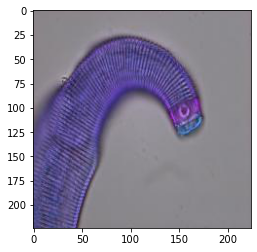

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb)
img_rgb.shape

(224, 224)

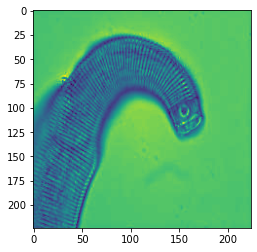

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img_gray)
img_gray.shape

In [4]:
#Rescale, resize image by a given factor. While rescaling image
#gaussian smoothing can performed to avoid anti aliasing artifacts.
img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)  #Check rescales image size in variable explorer

(56, 56)

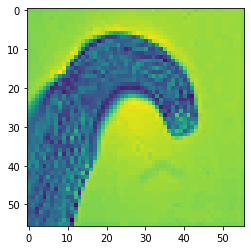

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img_rescaled)
img_rescaled.shape

In [6]:
#Resize, resize image to given dimensions (shape)
img_resized = resize(img, (200, 200),               #Check dimensions in variable explorer
                       anti_aliasing=True)

(200, 200)

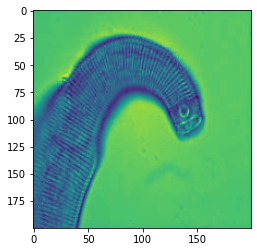

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_resized)
img_resized.shape

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


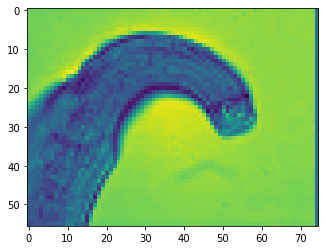

In [8]:
#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(img, (4, 3)) #224/4=56,224/3
plt.imshow(img_downscaled) #check size of the image
io.imsave('test_resize.png',img_resized)

In [9]:
################################################

#### change data type in skimage
from skimage import data, img_as_int
from skimage import exposure

img_rgb=io.imread("Test_images\\Desmodora sp1_GY_8S1D1 (13).jpg")
img_float_uint=img_as_int(img_rgb)

In [11]:
#plt.imshow(img_float_uint) #check size of the image
io.imsave('img_float_uint.png',img_float_uint)

Lossy conversion from int16 to uint8. Range [1028, 31739]. Convert image to uint8 prior to saving to suppress this warning.


(224, 224)


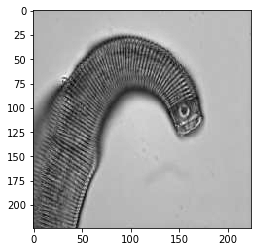

In [12]:
############### Edge Detection in skimage ###############

import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("Test_images\\Desmodora sp1_GY_8S1D1 (13).jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

(224, 224)


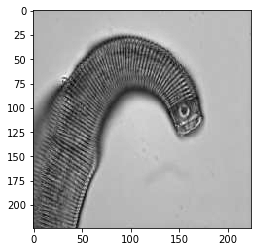

In [13]:
############### Edge Detection in skimage ###############

import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("Test_images\\Desmodora sp1_GY_8S1D1 (13).jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

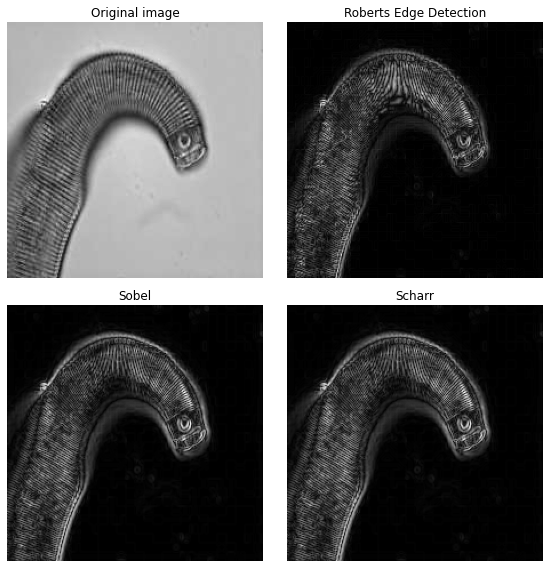

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

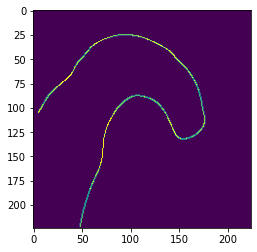

In [15]:
#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny)

In [16]:
############# local binary pattern in skimage
#LBP
import matplotlib.pyplot as plt
import skimage.feature
import numpy as np
img_ku = skimage.feature.local_binary_pattern(img,8,1.0,method='default')
img_ku = img_ku.astype(np.uint8)

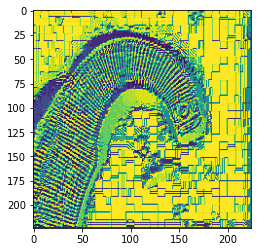

In [18]:
plt.imshow(img_ku)

In [19]:
#Histogram of Oriented Gradients (HOG) in skimage
#https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py
#Compute a Histogram of Oriented Gradients (HOG) by

#(optional) global image normalisation

#computing the gradient image in x and y

#computing gradient histograms

#normalising across blocks

#flattening into a feature vector

import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

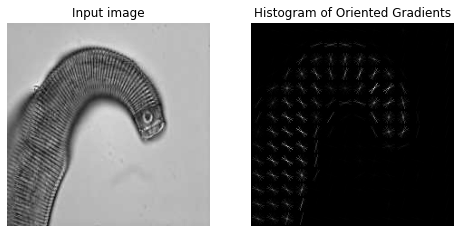

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

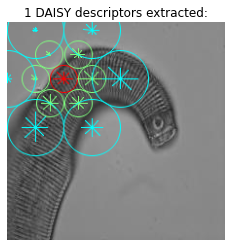

In [21]:
#Dense DAISY feature description
#https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_daisy.html#sphx-glr-auto-examples-features-detection-plot-daisy-py
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt

img
descs, descs_img = daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()       

In [22]:
################### Ridge filters###############################
"""
Ridge filters can be used to detect ridge-like structures, such as neurites, tubes, vessels, wrinkles.
The present class of ridge filters relies on the eigenvalues of the Hessian matrix of image intensities to detect ridge
structures where the intensity changes perpendicular but not along the structure.
"""

from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2

#Ridge operators 
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_ridge_filter.html#sphx-glr-auto-examples-edges-plot-ridge-filter-py
from skimage.filters import meijering, sato, frangi, hessian
#pathimage="C:\\Users\\Administrateur\\Desktop\\ENIB_work\\workshop_material\\Day1_matrial\\train\\class3Max\\14.png"
#load image
import cv2

#img = io.imread(pathimage)
img_gray

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
meijering_img = meijering(img_gray)
sato_img = sato(img_gray)
frangi_img = frangi(img_gray)
hessian_img = hessian(img_gray)

<ipython-input-22-8af1c7532e16>:25: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  sato_img = sato(img_gray)
<ipython-input-22-8af1c7532e16>:27: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  hessian_img = hessian(img_gray)


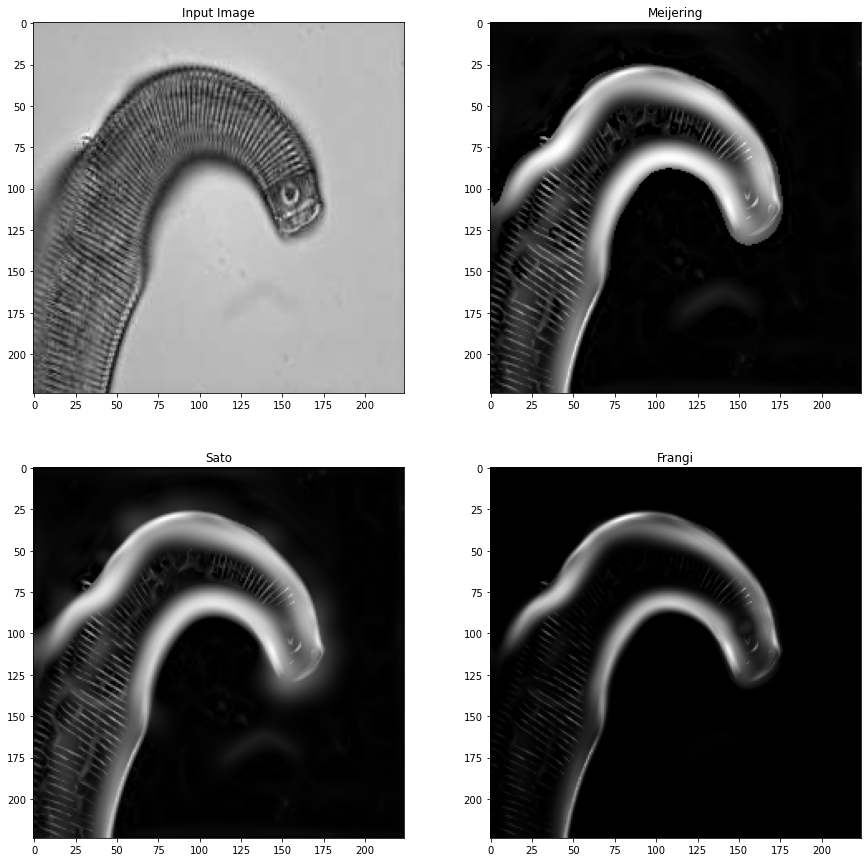

In [24]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(meijering_img, cmap='gray')
ax2.title.set_text('Meijering')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(sato_img, cmap='gray')
ax3.title.set_text('Sato')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(frangi_img, cmap='gray')
ax4.title.set_text('Frangi')
plt.show()